In [1]:
import requests
import os
import pandas as pd


In [2]:
api_address = 'https://elvia.azure-api.net/customer/metervalues/api/v1/'
api_fun = 'metervalues'
startTime = '2021-09-02T00:00:00+01:00'
endTime = '2021-10-02T00:00:00+01:00'
rest_query = f'?startTime={startTime}&endTime={endTime}'

In [3]:
request_url = api_address + api_fun + rest_query

In [4]:
headers = {'Authorization': f'''Bearer {os.getenv('ELVIA_API_METERVALUES_TOKEN')}'''}

In [5]:
response = requests.get(url=request_url,headers=headers)
print(response.status_code)

200


In [6]:
json_data = response.json()

In [7]:
meterdata_df = pd.DataFrame().from_records(json_data['meteringpoints'][0]['metervalue']['timeSeries'])

In [8]:
meterdata_df['startTime'] = pd.to_datetime(meterdata_df['startTime'])
meterdata_df['endTime']= pd.to_datetime(meterdata_df['endTime'])

In [9]:
meterdata_df = meterdata_df.set_index('endTime')

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='endTime'>

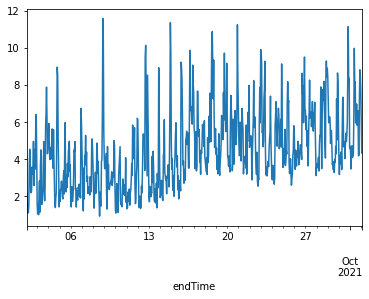

In [10]:
meterdata_df['value'].plot()